In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [33]:
# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [34]:
# 1. What are the features used in this dataset for customer segmentation?
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [35]:
# 2. What is the distribution of the 'Age' feature in the dataset?
age_dist = df['Age'].describe()
print(age_dist)

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [36]:
# 3. Which feature has the highest correlation with the 'Spending Score (1-100)' feature?
corr_matrix = df.corr()
print(corr_matrix['Spending Score (1-100)'].sort_values(ascending=False).index[1])

CustomerID


<ipython-input-36-b51724b4bda7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

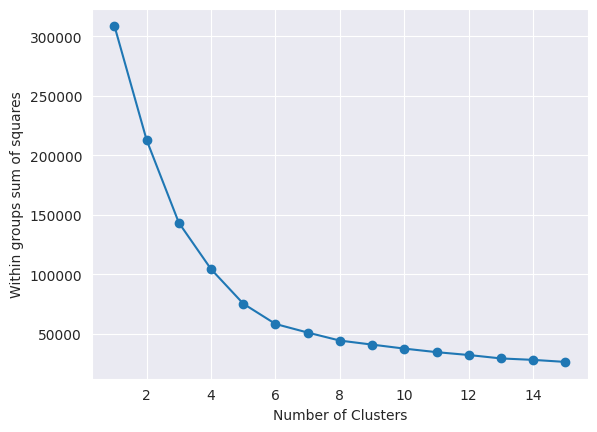

In [37]:
# 4. What is the optimal number of clusters for customer segmentation according to the Elbow Method?
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

wss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 16), wss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within groups sum of squares')
plt.show()

In [38]:
# 5. What is the average annual income of customers in the dataset?
avg_income = df['Annual Income (k$)'].mean()
print(avg_income)

60.56


In [39]:
# 6. What is the average spending score of male customers in the dataset?
male_avg_score = df[df['Gender'] == 'Male']['Spending Score (1-100)'].mean()
print(male_avg_score)

48.51136363636363


In [40]:
#7. Which cluster has the highest average income and spending score?
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Calculate the mean of the 'Annual Income (k$)' and 'Spending Score (1-100)' columns for each cluster
cluster_means = df.groupby('Cluster')['Annual Income (k$)', 'Spending Score (1-100)'].mean()

# Find the cluster with the highest mean income and spending score
if len(cluster_means) > 0:
  highest_mean_cluster = cluster_means[(cluster_means['Annual Income (k$)'] == cluster_means['Annual Income (k$)'].max()) &
                                      (cluster_means['Spending Score (1-100)'] == cluster_means['Spending Score (1-100)'].max())]

  # Print the result
  if len(highest_mean_cluster) > 0:
    print("Cluster", highest_mean_cluster.index[0], "has the highest average income and spending score.")
  else:
    print("No cluster with the highest average income and spending score.")
else:
  print("No clusters found.")

No cluster with the highest average income and spending score.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-40-1e2ad3c2dd5e>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = df.groupby('Cluster')['Annual Income (k$)', 'Spending Score (1-100)'].mean()


In [41]:
# 8. What is the percentage of customers in Cluster 1?
cluster1_percentage = df[df['Cluster'] == 1].shape[0] / df.shape[0] * 100

# Print the result
print("The percentage of customers in Cluster 1 is:", round(cluster1_percentage, 2), "%")

The percentage of customers in Cluster 1 is: 17.5 %


In [42]:
# 9. What is the most frequent age group in Cluster 2?
cluster2_df = df[df['Cluster'] == 2]

# Calculate the most frequent age group in Cluster 2
most_frequent_age_group = cluster2_df['Age'].mode()[0]

# Print the result
print("The most frequent age group in Cluster 2 is:", most_frequent_age_group, "years")

The most frequent age group in Cluster 2 is: 35 years


In [43]:
# 10. What is the average income of customers in Cluster 3?
cluster3_df = df[df['Cluster'] == 3]

# Calculate the average income of customers in Cluster 3
average_income = cluster3_df['Annual Income (k$)'].mean()

# Print the result
print("The average income of customers in Cluster 3 is:", average_income, "k$")

The average income of customers in Cluster 3 is: 25.727272727272727 k$


In [44]:
# 11. Show the count of values in each cluster.
print(df['Cluster'].value_counts())

0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64


In [45]:
# 12. Show customers from each cluster.
for cluster_label in range(kmeans.n_clusters):
    print("Customers in Cluster ", cluster_label, ":")
    print(df[df['Cluster'] == cluster_label])
    print()

Customers in Cluster  0 :
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
43           44  Female   31                  39                      61   
46           47  Female   50                  40                      55   
47           48  Female   27                  40                      47   
48           49  Female   29                  40                      42   
49           50  Female   31                  40                      42   
..          ...     ...  ...                 ...                     ...   
121         122  Female   38                  67                      40   
122         123  Female   40                  69                      58   
126         127    Male   43                  71                      35   
132         133  Female   25                  72                      34   
142         143  Female   28                  76                      40   

     Cluster  
43         0  
46         0  
47         0  
4

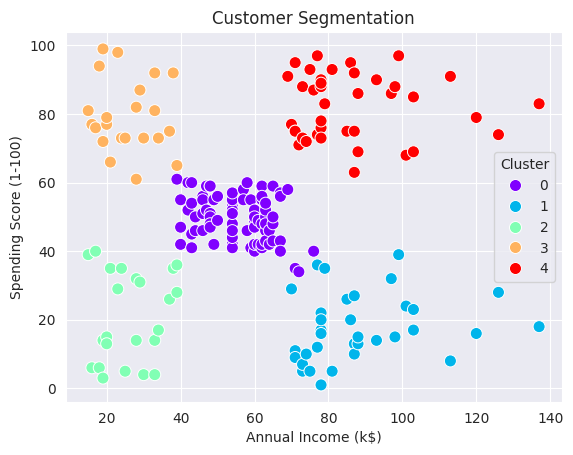

In [46]:
# 13. Make a visualization of the clusters.
sns.set_style('darkgrid')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='rainbow', s=75)
plt.title('Customer Segmentation')
plt.show()